# <font color=blue>Assignments for "Plotting Basic Charts With Matplotlib"</font>

In this assignment, you will continue work with the [Coronavirus Source Data](https://ourworldindata.org/coronavirus-source-data). You will plot different chart types. Don't forget to set titles and axis labels.

1. Plot a bar chart for total cases of the 20 countries that havebiggest numbers.

             location  total_cases
16475            Iraq     156995.0
11757          France     204172.0
8725          Germany     218519.0
33152          Turkey     243180.0
17153           Italy     251237.0
1360        Argentina     253855.0
3351       Bangladesh     263503.0
26276        Pakistan     285921.0
28871    Saudi Arabia     291468.0
12295  United Kingdom     312789.0
16251            Iran     331189.0
6279            Chile     376616.0
7274         Colombia     410453.0
26595            Peru     489680.0
22066          Mexico     492522.0
35764    South Africa     566109.0
28560          Russia     897599.0
15801           India    2329638.0
4927           Brazil    3109630.0
34200   United States    5141207.0


<function matplotlib.pyplot.show(*args, **kw)>

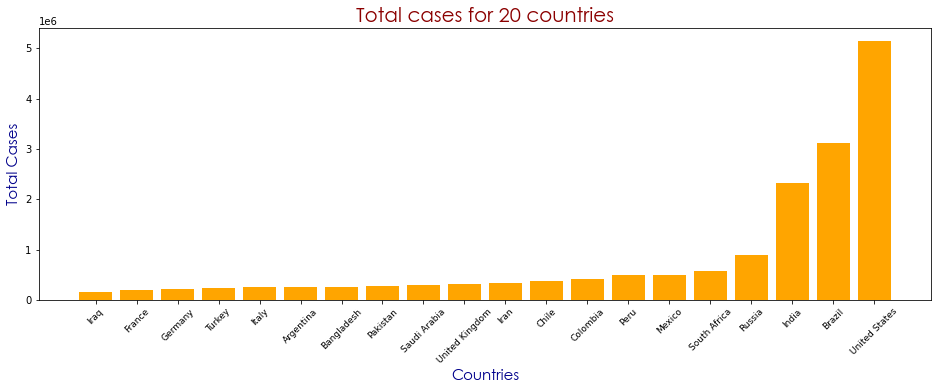

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

title_style = {'family': 'Century Gothic', 'color': 'darkred', 'size': 20 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 15 }

df = pd.read_csv('data/owid-covid-data.csv', parse_dates=["date"], low_memory=False)

new_df = pd.DataFrame(df[df["location"].isin(["Spain","France","Germany","Italy"])])
new_d = new_df["date"].sort_values()
last_day = new_d.iloc[-1]

y = df[df["date"]==last_day]['total_cases']
x = df[df["date"]==last_day]['location']

z = x.to_frame()
z["total_cases"] = y.to_frame()
z = z.sort_values(by=['total_cases'])
z = z.iloc[-21:-1,:]
print(z)

plt.figure(figsize=(16,5))
plt.title("Total cases for 20 countries",fontdict = title_style)
plt.bar(z.loc[:,"location"],z.loc[:,"total_cases"],color="orange")
plt.xlabel("Countries",fontdict = axis_style)
plt.ylabel("Total Cases", fontdict = axis_style)
plt.xticks(rotation=45,fontsize=9)
plt.show


2. Plot a histogram for daily deaths for any country you choose. Make three subplots for different bins.

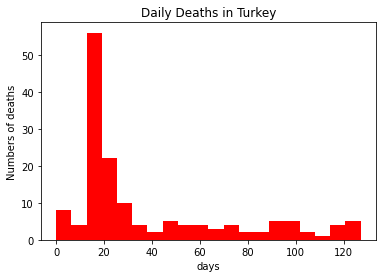

In [3]:

turkey_statistics = df[df["location"]=="Turkey"]
daily_deaths_in_turkey = turkey_statistics.loc[:,"new_deaths"]
plt.hist(daily_deaths_in_turkey,bins=20,color="red")

plt.title("Daily Deaths in Turkey")
plt.xlabel("days")
plt.ylabel("Numbers of deaths")
plt.show()

3. Plot a scatter plot of new cases and new death for Germany and France.

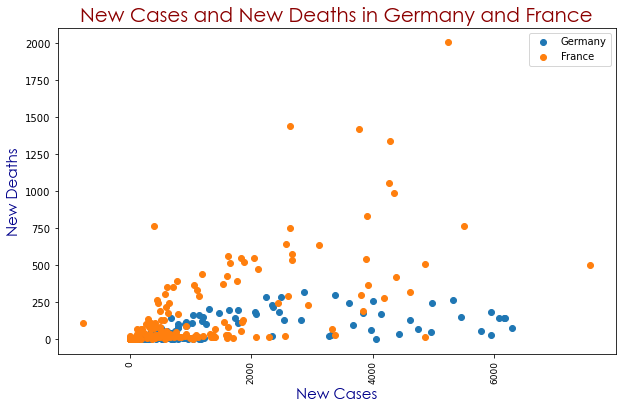

In [4]:
plt.figure(figsize=(10, 6))
plt.title('New Cases and New Deaths in Germany and France', fontdict = title_style)
for country in ['Germany','France']:
    plt.scatter(df[df.location == country].new_cases,df[df.location == country].new_deaths,label=country)
plt.xlabel('New Cases',fontdict = axis_style)
plt.ylabel('New Deaths', fontdict = axis_style)
plt.xticks(rotation = 90, fontsize = 9)
plt.legend()
plt.show()

4. Plot a boxplot for daily deaths for any country you choose.

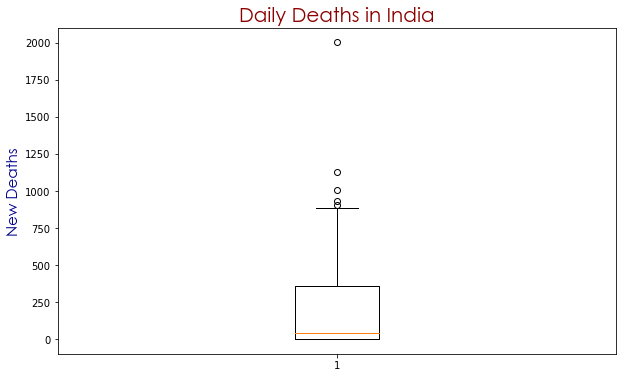

In [5]:
plt.figure(figsize=(10, 6))
plt.title('Daily Deaths in India', fontdict = title_style)
plt.boxplot(df[df.location == 'India'].new_deaths)
plt.ylabel('New Deaths', fontdict = axis_style)

plt.show()

5. Calculate the total case for each continent and plot a pie chart 

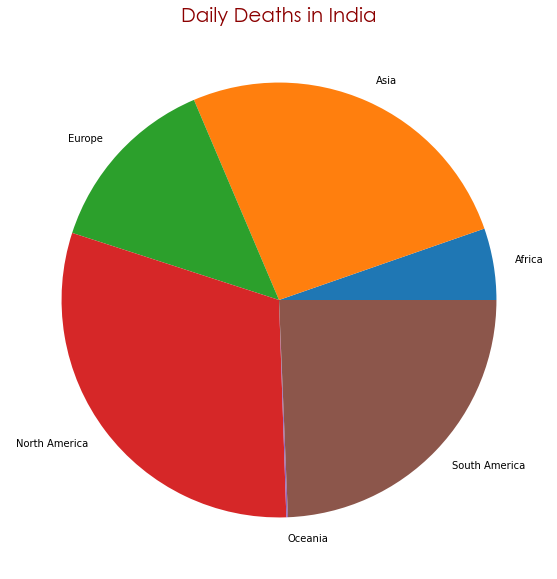

In [6]:
new_d = df["date"].sort_values()
last_day = new_d.iloc[-1]

y = df[df["date"]==last_day]['total_cases']
y = y.iloc[:-1]
x = df[df["date"]==last_day]['continent']
x = x.iloc[:-1]

z = x.to_frame()
z["total_cases"] = y.to_frame()
z = z.sort_values(by=['total_cases'])
z = pd.DataFrame(z.groupby("continent").agg({"total_cases":['sum']}))


plt.figure(figsize=(20, 10))
plt.pie(z["total_cases"]["sum"][:],labels=z.index)
plt.title('Daily Deaths in India', fontdict = title_style)
plt.show()